In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from joblib import dump, load


In [2]:
# Assuming X_train and X_test are your training and testing data
scaler = StandardScaler()
linReg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=200)

In [3]:
# preprocess data

def preprocess_data(df):
    # Convert 'NA' to np.nan for all columns
    df.replace('NA', np.nan, inplace=True)
    
    # Convert all columns to numeric, coercing errors to NaN
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Fill missing values in each column with the column's median
    for col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)
    
    return df


In [82]:
# Load the dataset (assuming you have a CSV file with 'datetime' and 'temperature' columns)
springData = pd.read_csv("../datasets/springData.csv")
springData['datetime'] = pd.to_datetime(springData['datetime'], format='%d/%m/%y %H:%M')
fallData = pd.read_csv("../datasets/fallData.csv")
fallData['datetime'] = pd.to_datetime(fallData['datetime'], format='%d/%m/%y %H:%M')
print("🚀 ~ X_train:", springData['datetime'])
data = pd.concat([springData, fallData])
data = preprocess_data(data);
print("🚀 ~ X_train:",data['datetime'])

data['datetime'] = pd.to_datetime(data['datetime'])
print("🚀 ~ datetime:", data['datetime'])

X = data[['t2m', 'sp', 'spDayBefore','tcc', 'tHeightAvg', 'uHeightAvg', 'vHeightAvg',
          'u10','v10', 'u100', 'v100', 'FranceCoast_sp', 'UK_sp', 'Noorway_sp', 'MeckPom_sp', 'Denmark_sp', 
          'Sweden_sp', 'Noorway_u10', 'Noorway_v10', 'MeckPom_u10', 'MeckPom_v10', 'Denmark_u10', 'Denmark_v10', 
          'Sweden_u10', 'Sweden_v10', 'FranceCoast_u10', 'FranceCoast_v10', 'UK_u10', 'UK_v10']]
y = data['vid']

# Split the data into training and testing sets
# I have data starting from 2008 to 2019
# I want to test 2019 data and rest for training
# X_train = X[X['timestamp'] < 1546300800]
# X_test = X[X['timestamp'] >= 1546300800]
# y_train = y[X['timestamp'] < 1546300800]
# y_test = y[X['timestamp'] >= 1546300800]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Drop the 'datetime' column
# X_train = X_train.drop(['timestamp'], axis=1)
# print("🚀 ~ X_train:", data['datetime'])
# X_test = X_test.drop(['timestamp'], axis=1)

🚀 ~ X_train: 0        2008-02-15 00:00:00
1        2008-02-15 00:05:00
2        2008-02-15 00:10:00
3        2008-02-15 00:15:00
4        2008-02-15 00:20:00
                 ...        
193726   2019-04-30 23:35:00
193727   2019-04-30 23:40:00
193728   2019-04-30 23:45:00
193729   2019-04-30 23:50:00
193730   2019-04-30 23:55:00
Name: datetime, Length: 193731, dtype: datetime64[ns]
🚀 ~ X_train: 0         1203033600000000000
1         1203033900000000000
2         1203034200000000000
3         1203034500000000000
4         1203034800000000000
                 ...         
323161    1575153300000000000
323162    1575153600000000000
323163    1575153900000000000
323164    1575154200000000000
323165    1575154500000000000
Name: datetime, Length: 516897, dtype: int64
🚀 ~ datetime: 0        2008-02-15 00:00:00
1        2008-02-15 00:05:00
2        2008-02-15 00:10:00
3        2008-02-15 00:15:00
4        2008-02-15 00:20:00
                 ...        
323161   2019-11-30 22:35:00
323162   

In [25]:

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
linReg.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200)

In [40]:
decTree = DecisionTreeRegressor(random_state=42)
decTree.fit(X_train_scaled, y_train)
dump(decTree, '../models/decTree_full.joblib')

['../models/decTree_full.joblib']

In [41]:
decTreeModel = load('../models/decTree_full.joblib')
yPredDecTree = decTreeModel.predict(X_test_scaled)

print("Decision Tree Regressor")
print("Mean Absolute Error: ", mean_absolute_error(y_test, yPredDecTree))
print("Mean Squared Error: ", mean_squared_error(y_test, yPredDecTree))
print("R2 Score: ", r2_score(y_test, yPredDecTree))

Decision Tree Regressor
Mean Absolute Error:  0.4993653757042174
Mean Squared Error:  2.0310446690737485
R2 Score:  0.9493586159934804


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train_scaled, y_train)

dump(gbr_model, '../models/GBR_full.joblib')

['../models/GBR_full.joblib']

In [44]:
loaded_gbr_model = load('../models/GBR_full.joblib')
yPredGBR = loaded_gbr_model.predict(X_test_scaled)

print("Gradient Boosting Regressor")
print("Mean Absolute Error: ", mean_absolute_error(y_test, yPredGBR))
print("Mean Squared Error: ", mean_squared_error(y_test, yPredGBR))
print("R2 Score: ", r2_score(y_test, yPredGBR))

Gradient Boosting Regressor
Mean Absolute Error:  2.8052672037650845
Mean Squared Error:  27.734543862021887
R2 Score:  0.3084762204649901


In [45]:
linRegPath = '../models/linearReg_full.joblib'
rfRegPath = '../models/rf_reg_full.joblib'

In [46]:
dump(linReg, linRegPath)
dump(rf_reg, rfRegPath)

['../models/rf_reg_full.joblib']

In [47]:
# load the models
linearModel = load(linRegPath)
rfModel = load(rfRegPath)

In [48]:
# Predict
y_pred_linear = linearModel.predict(X_test_scaled)
y_pred_rf = rfModel.predict(X_test_scaled)

In [49]:
# calculate the accracy of the model
print("Linear Regression")
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_linear))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_linear))
print("R2 Score: ", r2_score(y_test, y_pred_linear))

print("Random Forest")
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_rf))
print("R2 Score: ", r2_score(y_test, y_pred_rf))



Linear Regression
Mean Absolute Error:  3.140388876803466
Mean Squared Error:  35.614152101169175
R2 Score:  0.1120087213815889
Random Forest
Mean Absolute Error:  0.3887227608335409
Mean Squared Error:  0.8736194240661028
R2 Score:  0.9782174673933379


In [ ]:
# write a function that will take the input and return the prediction
# input will be a dictionary with the following keys
# 't2m', 'sp', 'spDayBefore', 'tp', 'tcc', 'tHeightAvg'
def predict_vid(input):
    # convert the input to a dataframe
    input_df = pd.DataFrame(input, index=[0])
    # scale the input
    input_scaled = scaler.fit_transform(input_df)
    # predict
    prediction = rfModel.predict(input_scaled)
    return prediction

# test the function
input = {'t2m': 285.06, 'sp': 102078.0901, 'spDayBefore': 102435.0368, 'tp': 0.000000846, 'tcc': 0.51399893, 'tHeightAvg': 279.3657916}
print('pre dicted vertical integrated density of birds when')
print ('surface temperature is 285.06K, surface pressure is 102078.0901Pa, surface pressure of the day before is 102435.0368Pa,')
print ('total precipitation is 0.000000846, total cloud cover is 0.51399893 and Average air temperate between 400 and a 1000m is 279.3657916K is:')
print('is: ',predict_vid(input)[0], ' birds/km^2')

In [50]:
from sklearn.naive_bayes import GaussianNB

num_bins = 10  # Number of bins
y_train_binned = np.digitize(y_train, bins=np.linspace(np.min(y_train), np.max(y_train), num_bins))
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train_binned)

dump(gnb, '../models/gnb_full.joblib')

['../models/gnb_full.joblib']

In [51]:
loaded_gnb_model = load('../models/gnb_full.joblib')

yPredGnb = loaded_gnb_model.predict(X_test_scaled)

y_test_binned = np.digitize(y_test, bins=np.linspace(np.min(y_test), np.max(y_test), num_bins))
print("Naive Bayes Regressor")
print("Mean Absolute Error: ", mean_absolute_error(y_test_binned, yPredGnb))
print("Mean Squared Error: ", mean_squared_error(y_test_binned, yPredGnb))
print("R2 Score: ", r2_score(y_test_binned, yPredGnb))

Naive Bayes Regressor
Mean Absolute Error:  1.254962275101567
Mean Squared Error:  4.870439156509963
R2 Score:  -123.74979264708479


In [52]:
dtModel = load('../models/decTree_full.joblib')
gbrModel = load('../models/GBR_full.joblib')
linearModel = load('../models/linearReg_full.joblib')
rfModel = load('../models/rf_reg_full.joblib')

dt_pred = dtModel.predict(X_test_scaled)
gbr_pred = gbrModel.predict(X_test_scaled)
linear_pred = linearModel.predict(X_test_scaled)
rf_pred = rfModel.predict(X_test_scaled)


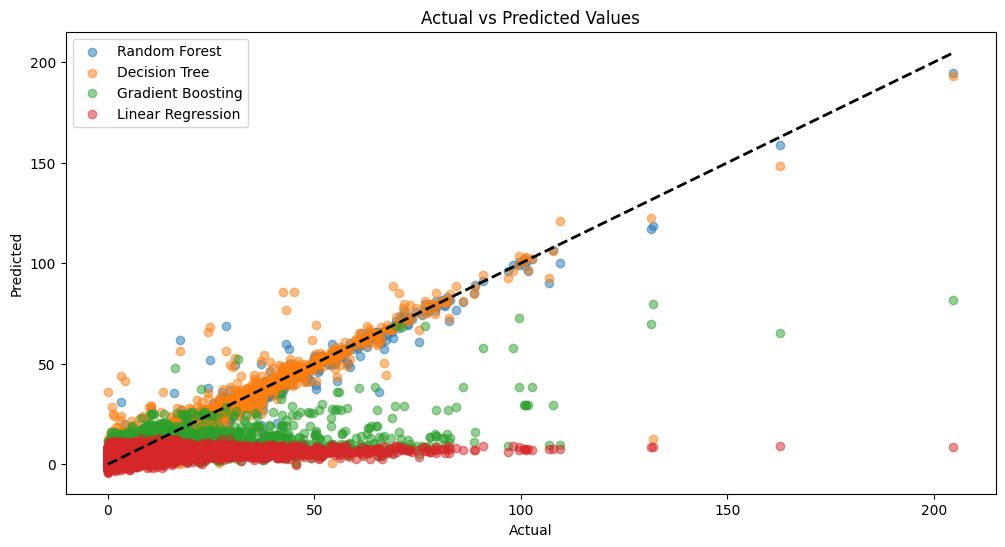

<Figure size 640x480 with 0 Axes>

In [53]:
plt.figure(figsize=(12, 6))

# Example for Random Forest
plt.scatter(y_test, rf_pred, label='Random Forest', alpha=0.5)
plt.scatter(y_test, dt_pred, label='Decision Tree', alpha=0.5)
plt.scatter(y_test, gbr_pred, label='Gradient Boosting', alpha=0.5)
plt.scatter(y_test, linear_pred, label='Linear Regression', alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
plt.savefig('../output-results/comparisonModels.png')

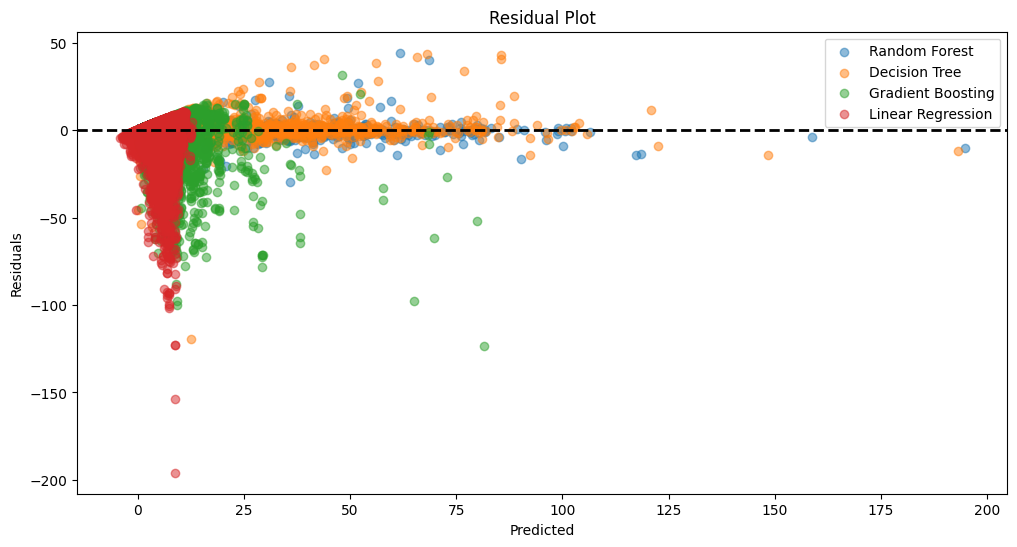

<Figure size 640x480 with 0 Axes>

In [54]:
plt.figure(figsize=(12, 6))

# Example for Random Forest
plt.scatter(rf_pred, rf_pred - y_test, label='Random Forest', alpha=0.5)
plt.scatter(dt_pred, dt_pred - y_test, label='Decision Tree', alpha=0.5)
plt.scatter(gbr_pred, gbr_pred - y_test, label='Gradient Boosting', alpha=0.5)
plt.scatter(linear_pred, linear_pred - y_test, label='Linear Regression', alpha=0.5)

plt.axhline(y=0, color='black', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()
plt.savefig('../output-results/residualPlot.png')

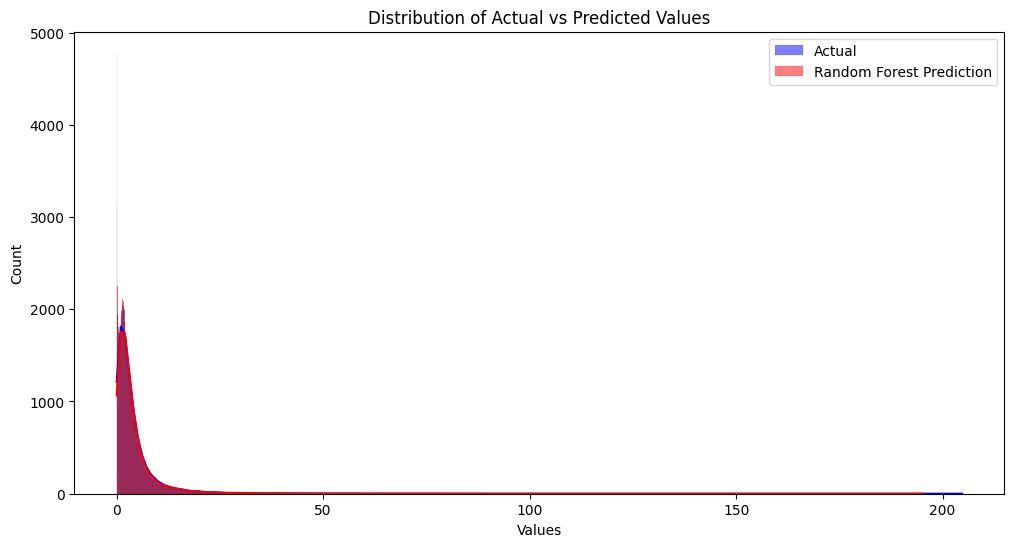

<Figure size 640x480 with 0 Axes>

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 6))

# Example for Random Forest
sns.histplot(y_test, color='blue', label='Actual', kde=True)
sns.histplot(rf_pred, color='red', label='Random Forest Prediction', kde=True, alpha=0.5)

plt.title('Distribution of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Count')
plt.legend()
plt.show()
plt.savefig('../output-results/distributionModels.png')

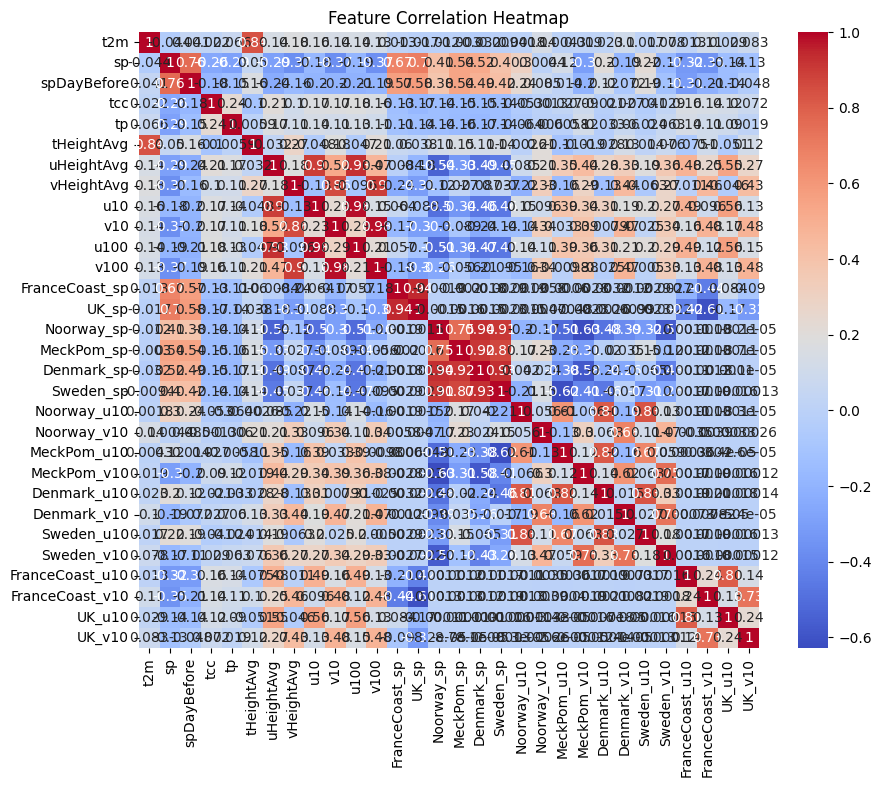

<Figure size 640x480 with 0 Axes>

In [55]:
corr = corr_matrix = X_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
plt.savefig('../output-results/heatMap.png')

In [56]:
# accuracy metrics

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_pred)

gbr_mae = mean_absolute_error(y_test, gbr_pred)
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_rmse = np.sqrt(gbr_mse)
gbr_r2 = r2_score(y_test, gbr_pred)

linear_mae = mean_absolute_error(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_pred)

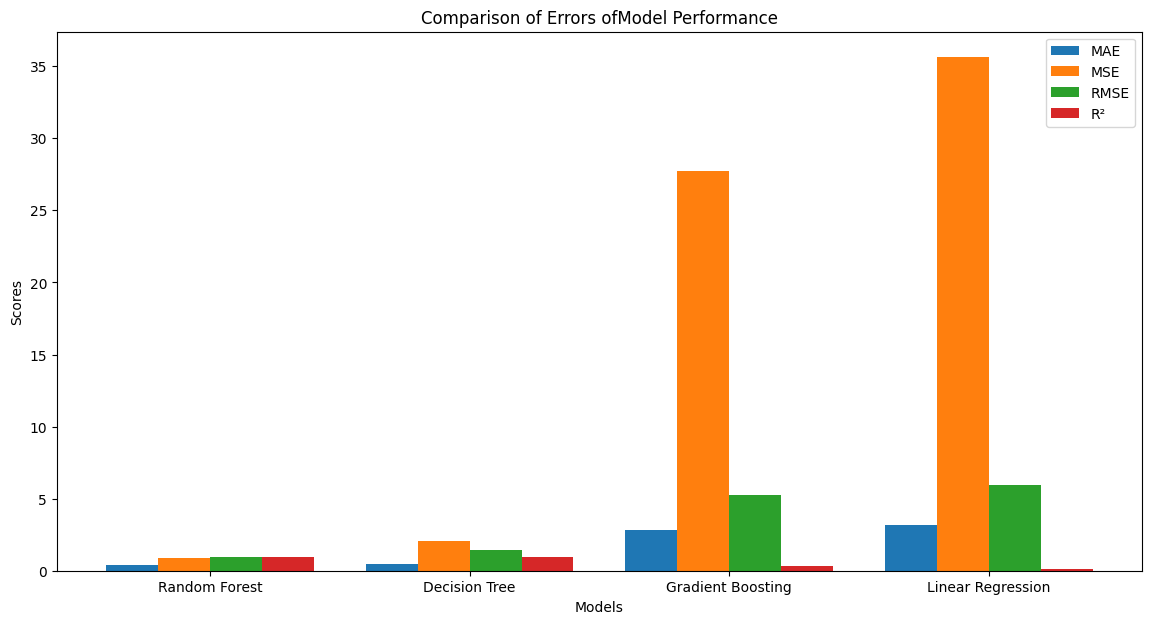

<Figure size 640x480 with 0 Axes>

In [57]:
# Assuming you have calculated these metrics for all models
models = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'Linear Regression']
mae = [rf_mae, dt_mae, gbr_mae, linear_mae]
mse = [rf_mse, dt_mse, gbr_mse, linear_mse]
rmse = [rf_rmse, dt_rmse, gbr_rmse, linear_rmse]
r2 = [rf_r2, dt_r2, gbr_r2, linear_r2]

x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(14, 7))

plt.bar(x - width, mae, width, label='MAE')
plt.bar(x, mse, width, label='MSE')
plt.bar(x + width, rmse, width, label='RMSE')
plt.bar(x + 2*width, r2, width, label='R²')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Errors ofModel Performance')
plt.xticks(x + width / 2, models)
plt.legend()
plt.show()
plt.savefig('../output-results/errorCoparison.png')

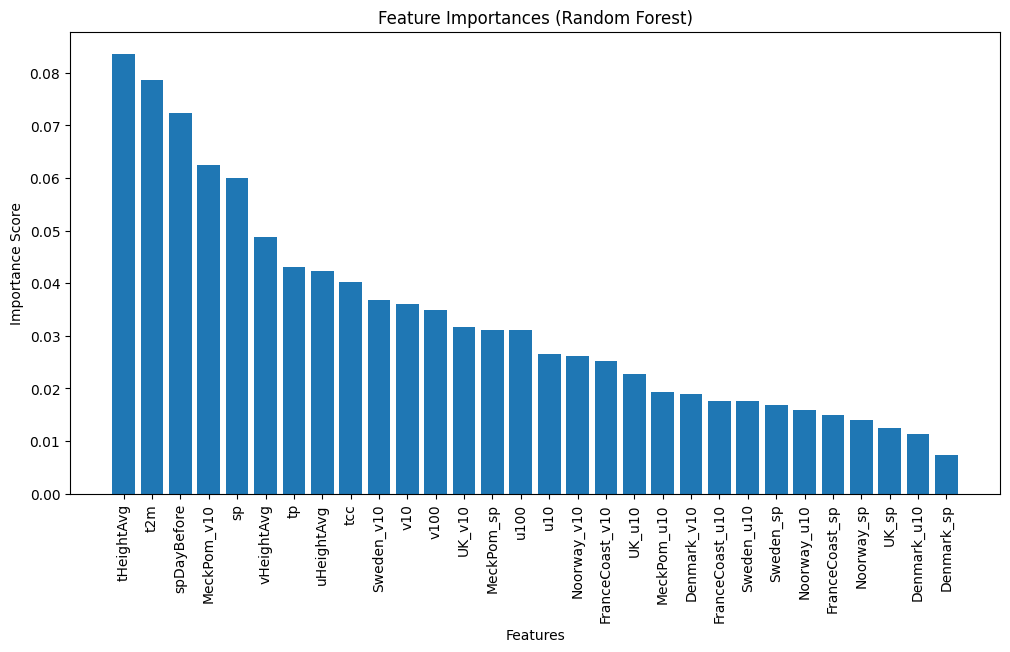

In [58]:
importances = rfModel.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

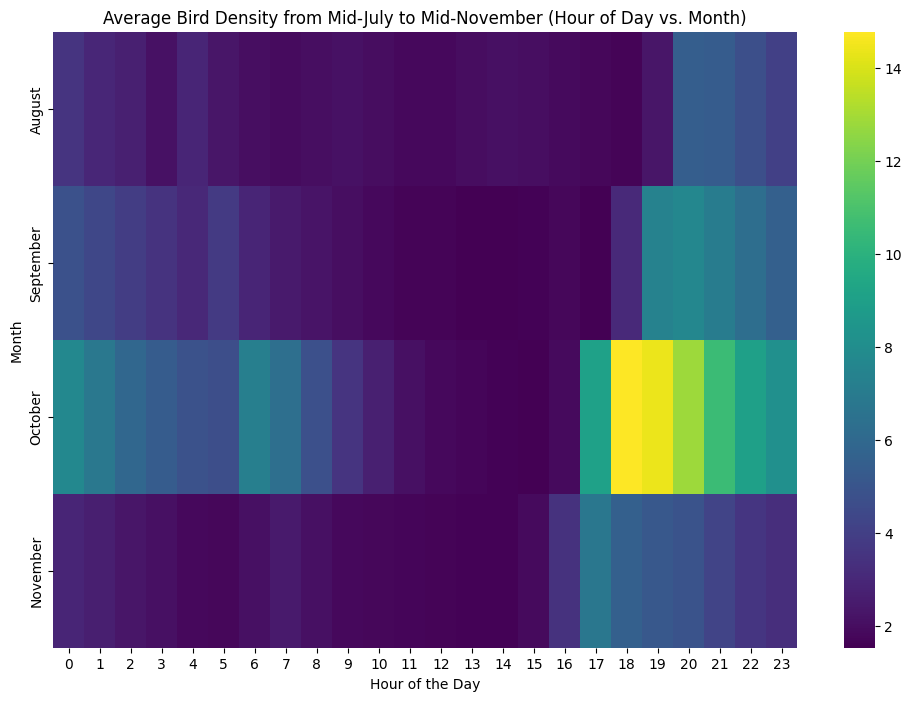

<Figure size 640x480 with 0 Axes>

In [86]:
# Filter the data for mid-July to mid-November
data_filtered = data[(data['datetime'].dt.month >= 7) & (data['datetime'].dt.month <= 11)]
data_filtered = data_filtered[(data_filtered['datetime'].dt.month != 6)]
data_filtered = data_filtered[(data_filtered['datetime'].dt.month != 12)]

# Extract the hour of the day and the month label
data_filtered['hour'] = data_filtered['datetime'].dt.hour
data_filtered['month'] = data_filtered['datetime'].dt.strftime('%B')  # Convert month numbers to month names

month_order = ['July', 'August', 'September', 'October', 'November']

# Convert 'month' to categorical with the defined order
data_filtered['month'] = pd.Categorical(data_filtered['month'], categories=month_order, ordered=True)
# Create a pivot table with months on one axis and hours of the day on the other
pivot_table = data_filtered.pivot_table(
    index='month',      # Group by month
    columns='hour',     # Group by hour of the day
    values='vid',       # The value to aggregate (bird density)
    aggfunc='mean'      # Aggregate function (mean)
)

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Average Bird Density from Mid-July to Mid-November (Hour of Day vs. Month)')
plt.xlabel('Hour of the Day')
plt.ylabel('Month')
plt.show()
v=plt.savefig('../output-results/AverageBirdDensityInTime.png')

In [ ]:
data['day_of_year'] = data['datetime'].dt.dayofyear

# Filter data from August 1 to November 30
filtered_data = data[(data['datetime'].dt.month >= 8) & (data['datetime'].dt.month <= 11)]

# Assuming you have predicted values in a separate DataFrame or series `predicted_vid`
# Ensure that `predicted_vid` is aligned with `filtered_data`
filtered_data['predicted_vid'] = predicted_vid

# Group by day of year to average over all years
observed_avg = filtered_data.groupby('day_of_year')['vid'].mean()
predicted_avg = filtered_data.groupby('day_of_year')['predicted_vid'].mean()

# Reset the index for plotting
observed_avg = observed_avg.reset_index()
predicted_avg = predicted_avg.reset_index()

plt.figure(figsize=(14, 8))

# Plot observed values
plt.plot(observed_avg['day_of_year'], observed_avg['vid'], label='Observed Bird Density', color='blue')

# Plot predicted values
plt.plot(predicted_avg['day_of_year'], predicted_avg['predicted_vid'], label='Predicted Bird Density', color='red')

# Labeling the axes
plt.xlabel('Day of the Year (August to November)')
plt.ylabel('Bird Density (VID)')
plt.title('Observed vs. Predicted Bird Density from August to November')

# Add legend
plt.legend()

# Show plot
plt.show()